# Practical Application Assignment 17.1: Comparing Classifiers
`The bank marketing project consists of tThe data consisting of direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.`

## Understanding the task (classification problem)
`The task here is to classify whether a classify will subscribe to the term deposit. We use the banking information related to 
client, other attributes related to marketing campaign.`

In [55]:
#import all necessary libraries
import plotly.express as px 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


## Load the bank marketing dataset

In [56]:
# Import data
df = pd.read_csv('data/bank-full.csv', delimiter = ";")

## Data Exploration
`The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns`

In [39]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [40]:
#get an overview of the column types on the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [41]:
#get the dataframe dimensions
df.shape

(45211, 17)

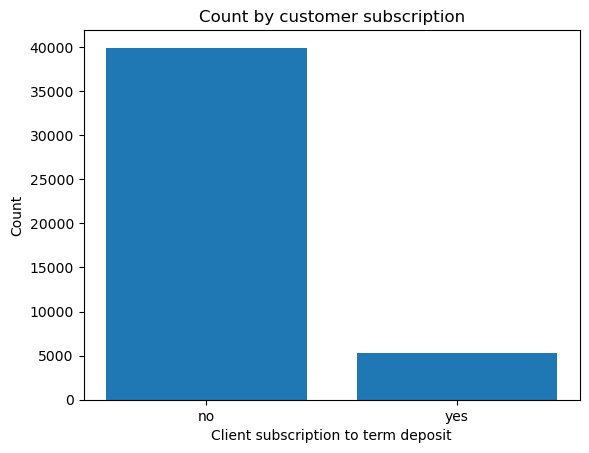

In [42]:
#TASK 1: Create barplot using Matplolib
plt.bar(df['y'].unique(),df['y'].value_counts() )
plt.xlabel("Client subscription to term deposit")
plt.ylabel("Count")
plt.title("Count by customer subscription")
#plt.savefig('results/img1.png')
plt.show()

Observation: the plot indicates an imbalanced class.

In [43]:
#Percentage of the class distribution
a = df['y'][df['y'] == 'no'].count()
b = df['y'][df['y'] == 'yes'].count()
c = len(df1)
print(f'no-class: {a/c*100:.2f}%')
print(f'yes-class: {b/c*100:.2f}%')

no-class: 88.30%
yes-class: 11.70%


## Data Preprocessing
### Encoding categorial data
`Label Encoding is generally used for categorical variables with an inherent order or hierarchy (e.g., low, medium, high).
One-Hot Encoding is used when there is no order between categories (e.g., Color or Shape), as it prevents the model from assuming any order between the categories.`

In [60]:
data = pd.get_dummies(df, drop_first=True) 
data.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,33,2,5,76,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,47,1506,5,92,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


### Set the independent and target variable

In [61]:
#set X and Y varaible: Split data into features (X) and response (y).
X = data.drop(columns='y_yes')
y = data['y_yes']

In [62]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Data Modeling

In [71]:
# create a data structure consisting the models under consideration     
models = {
        'Logistic Regression': LogisticRegression(),
        'Decision Tree': DecisionTreeClassifier(random_state=42),
        'K-Nearest Neighbors': KNeighborsClassifier(),
        'Support Vector Machine': SVC()
    }

In [65]:
# Store results are this empty structure
results = {}

# Perform cross-validation and collect scores and fit times
for model_name, model in models.items():
    # Perform cross-validation to get train score, test score, and fit time
    cv_results = cross_validate(model, X_train, y_train, cv=5, return_train_score=True, return_estimator=True)
       # Get mean scores and fit time
    results[model_name] = {
        'Train Score': np.mean(cv_results['train_score']),
        'Test Score': np.mean(cv_results['test_score']),
        'Average Fit Time': np.mean(cv_results['fit_time'])
    }
    

C:\Users\balek\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\balek\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

## Model Evaluation

In [73]:
# Display the results
for model_name, result in results.items():
    print(f"{model_name}:")
    print(f"  Train Score: {result['Train Score'] * 100:.2f}%")
    print(f"  Test Score: {result['Test Score'] * 100:.2f}%")
    print(f"  Average Fit Time: {result['Average Fit Time']:.4f} seconds")
    print("\n")

Logistic Regression:
  Train Score: 89.15%
  Test Score: 89.14%
  Average Fit Time: 0.5335 seconds


Decision Tree:
  Train Score: 100.00%
  Test Score: 87.27%
  Average Fit Time: 0.6667 seconds


K-Nearest Neighbors:
  Train Score: 91.06%
  Test Score: 88.17%
  Average Fit Time: 0.0407 seconds


Support Vector Machine:
  Train Score: 88.41%
  Test Score: 88.42%
  Average Fit Time: 61.4380 seconds




In [74]:
# Additional evaluation using test data for final accuracy
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy * 100:.2f}%")
    print(f"{model_name} Prescision: {precision * 100:.2f}%")
    print(f"{model_name} Recal: {recall * 100:.2f}%")
    print("\n")

C:\Users\balek\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 88.85%
Logistic Regression Prescision: 60.51%
Logistic Regression Recal: 21.91%


Decision Tree Accuracy: 87.05%
Decision Tree Prescision: 46.48%
Decision Tree Recal: 48.40%


K-Nearest Neighbors Accuracy: 87.55%
K-Nearest Neighbors Prescision: 47.26%
K-Nearest Neighbors Recal: 27.68%


Support Vector Machine Accuracy: 87.95%
Support Vector Machine Prescision: 53.85%
Support Vector Machine Recal: 0.64%




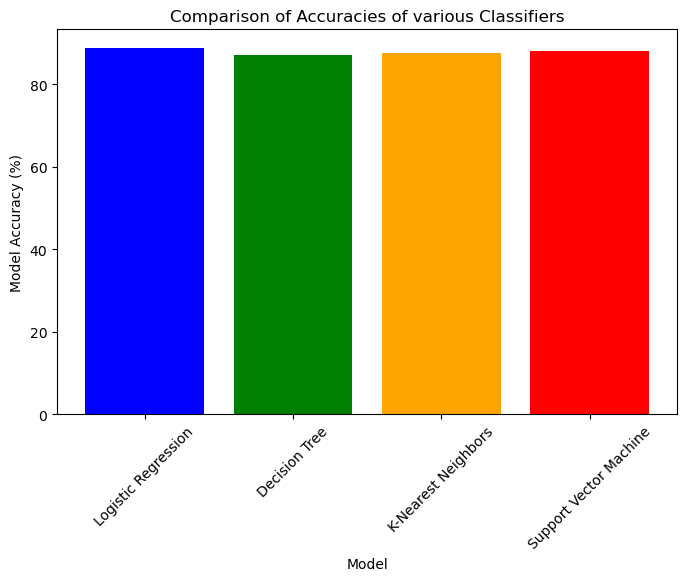

In [68]:
# models to consider for plotting
models = ['Logistic Regression', 'Decision Tree', 'K-Nearest Neighbors', 'Support Vector Machine']
accuracies = [88.85, 87.05, 87.55, 87.95]

# Creating a bar plot
plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red'])

# plot labels
plt.xlabel('Model')
plt.ylabel('Model Accuracy (%)')
plt.title('Comparison of Accuracies of various Classifiers')
plt.xticks(rotation=45)
plt.savefig('classifers.png')

# display plot
plt.show()


In [72]:
# #classification matrix and repot
for model_name, model in models.items():
    # Fitting the model
    model.fit(X_train, y_train)
    
    # Make y-predictions
    y_pred = model.predict(X_test)
    
    # compute confusion matrix and report
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_pred, y_test)
    
    # Print the model name and the confusion matrix
    print(f"Confusion Matrix for {model_name}:")
    print(cm)
    print("\n")
    print(f"Confusion report for {model_name}:")
    print(cr)
    print("\n")

C:\Users\balek\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix for Logistic Regression:
[[7796  156]
 [ 852  239]]


Confusion report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.98      0.90      0.94      8648
           1       0.22      0.61      0.32       395

    accuracy                           0.89      9043
   macro avg       0.60      0.75      0.63      9043
weighted avg       0.95      0.89      0.91      9043



Confusion Matrix for Decision Tree:
[[7344  608]
 [ 563  528]]


Confusion report for Decision Tree:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      7907
           1       0.48      0.46      0.47      1136

    accuracy                           0.87      9043
   macro avg       0.70      0.70      0.70      9043
weighted avg       0.87      0.87      0.87      9043



Confusion Matrix for K-Nearest Neighbors:
[[7615  337]
 [ 789  302]]


Confusion report for K-Nearest Neighbors:
              p

## Conclusion
Overall, Logistic Regression and Support Vector Machine provide the best generalization with similar test scores, which also contributes to the highest F1 scores (94%) exhibited by both models. However, Logistic Regression is faster. Decision Tree suffers from overfitting, while K-Nearest Neighbors strikes a balance between accuracy and training speed